In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("E:/Projects/hubble_constant_project/hubble_const_data/tully_fisher_data/baryonic_tully_fisher.csv")
data = data.loc[:]
data

,Unnamed: 0,Name,log(Mb),e_log(Mb),Inc,e_Inc,Vf,e_Vf,V2exp,e_V2exp,V2eff,e_V2eff,Vmax,e_Vmax,Wp20,e_Wp20,Wm50,e_Wm50,Wm50c,e_Wm50c
0,0,CamB,7.73,0.10,65,5,0.0,0.0,12.6,1.6,0.0,0.0,20.1,1.7,0.0,0.0,0.0,0.0,0.0,0.0
1,1,D512-2,8.43,0.27,56,10,0.0,0.0,36.6,6.0,0.0,0.0,37.2,6.1,113.4,20.8,107.4,20.4,0.0,0.0
2,2,D564-8,7.74,0.06,63,7,0.0,0.0,18.1,2.1,19.0,2.2,25.0,2.6,79.7,16.8,79.7,16.8,0.0,0.0
3,3,D631-7,8.68,0.05,59,3,57.7,4.1,28.1,2.5,36.5,2.2,58.5,4.4,126.0,16.5,122.5,16.5,0.0,0.0
4,4,DDO064,8.56,0.26,60,5,46.1,6.4,41.2,5.1,46.4,7.1,46.9,9.0,128.2,8.2,95.8,9.3,95.8,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,148,UGC12506,11.07,0.11,86,4,234.0,17.5,242.0,11.7,248.6,14.9,255.0,11.7,494.2,3.1,481.2,14.2,465.1,14.2
149,149,UGC12632,9.47,0.26,46,3,71.7,4.9,64.6,4.9,70.4,4.5,73.2,4.8,183.5,11.0,157.1,11.3,154.3,11.2
150,150,UGC12732,9.76,0.27,39,6,0.0,0.0,67.7,9.6,75.0,10.3,98.0,13.1,214.5,28.0,193.9,27.4,189.9,26.9
151,151,UGCA442,8.62,0.06,64,7,56.4,4.2,45.6,3.3,52.2,3.7,57.8,4.5,123.5,10.2,110.1,14.6,102.4,14.4


There are 152 datapoints. We will form the tully fisher template relation by linear regression fitting of portion of data, and predict the remaining data using the template, verifying the scatter of the estimation and the observed values.

In [3]:
rotation_vel = data[data['Vf']>0]['Vf']     # Omitting the data for galaxies with zero rotational velocity
baryonic_mass_actual = data[data['Vf']>0]['log(Mb)']


log_v_rot = np.zeros(len(rotation_vel))         # for calculating log of rotational velocities
for index, value in enumerate(rotation_vel):
    log_v_rot[index] = np.log10(value)

We need to plot log(M_b) vs log(Vf). So for both the dataframes, we will form template of 100 points to train and then predict the 23 remaining points in data.

In [4]:
x_train = log_v_rot[:100]        # first 100 entries are for Tully fisher template
y_train = baryonic_mass_actual[:100]

x_predict = log_v_rot[100:]       # Last 23 datapoints for verifying standard error in model
y_predict_actual = baryonic_mass_actual[100:]

In [5]:
result = stats.linregress(x_train, y_train)    # Linear fitting of training data
result

LinregressResult(slope=3.567262346919045, intercept=2.5809841068361843, rvalue=0.9701444585384669, pvalue=4.214440117644288e-62, stderr=0.09008388683396626, intercept_stderr=0.19170984898464877)

In [6]:
result_og = stats.linregress(log_v_rot,baryonic_mass_actual)  # linear fit of whole data
result_og

LinregressResult(slope=3.4863446052195526, intercept=2.7587221898693066, rvalue=0.9636783826467993, pvalue=3.1347091736878867e-71, stderr=0.08783412501839608, intercept_stderr=0.18463073362996563)

In [7]:
y_predict_predicted = result.intercept + result.slope * x_predict      # y= mx +c 

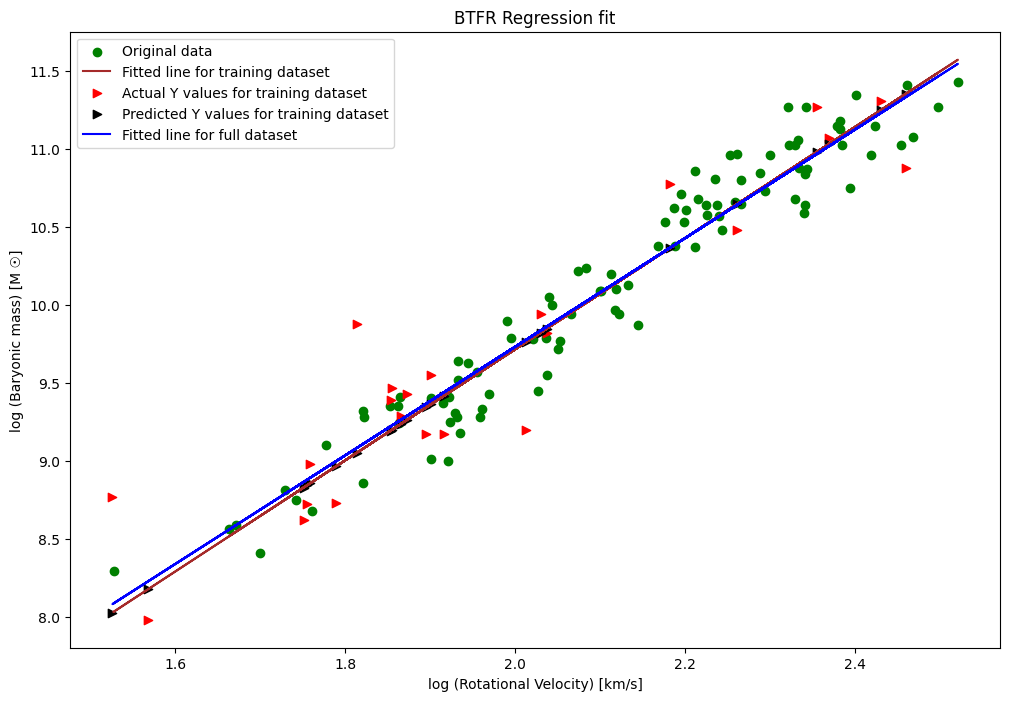

In [8]:
plt.figure(figsize =(12,8))

plt.scatter(x=x_train, y=y_train,color = 'green',label= 'Original data')     # Linear fitting model for training data (100 values)
plt.plot(x_train, result.intercept + result.slope * x_train, 'brown', label='Fitted line for training dataset')

plt.scatter(x_predict, y_predict_actual,marker='>', color= 'red', label= 'Actual Y values for training dataset')    # For plotting the actual values in the predict dataset (23 values)
plt.scatter(x_predict, y_predict_predicted,marker='>', color= 'black', label= 'Predicted Y values for training dataset')  # for plotting the predicted values of the same data by the model (23 values)

plt.plot(log_v_rot, result_og.intercept + result_og.slope * log_v_rot, 'blue', label='Fitted line for full dataset ')  # Linear fit of Whole data with train and predict datasets combined (123 points)  
plt.title('BTFR Regression fit')
plt.xlabel('log (Rotational Velocity) [km/s]')
plt.ylabel('log (Baryonic mass) [M ☉]')
plt.legend()

In [9]:
yerr = y_predict_actual - y_predict_predicted
yerr                                               # Error in predictions with respect to actual values

120    0.116778
121   -0.029019
123    0.827119
124    0.051479
126    0.166390
128   -0.561303
129    0.187960
132   -0.234888
133    0.124516
135   -0.245599
136   -0.172454
137   -0.121930
138   -0.166653
140    0.412753
141    0.285819
142    0.744163
143    0.196388
144    0.059150
147   -0.474820
148    0.037401
149    0.269892
151   -0.208256
152   -0.195171
Name: log(Mb), dtype: float64

Log M_b = 𝛼 log 𝑉𝑓𝑙𝑎𝑡 + 𝛽   is the Baryonic Tully Fisher Relation (BTFR) relation between the Baryonic mass of rotating galaxies and their rotation velocities. We use this now.

In [10]:
alpha = result_og.slope                                     
beta = result_og.intercept
print(alpha, beta)

log_baryonic_mass_graphical = alpha* log_v_rot + beta

3.4863446052195526 2.7587221898693066


In [11]:
comparison = pd.DataFrame({
    'log_baryonic_mass_actual': baryonic_mass_actual,    # This 'actual' value already contains the log value
    'log_baryonic_mass_graphical': log_baryonic_mass_graphical
})

comparison

,log_baryonic_mass_actual,log_baryonic_mass_graphical
3,8.68,8.898788
4,8.56,8.558957
5,8.59,8.588232
6,9.32,9.109146
7,8.81,8.790009
...,...,...
147,10.88,11.333538
148,11.07,11.018625
149,9.47,9.227701
151,8.62,8.864285


Relation expected by the Virial theorem : 

M  ∝ V^3


Relataion we obtained: 

M  ∝ V^(3.486344605219552)  


(Where the exponent of Velocity is the alpha value)